In [127]:
!pip install matplotlib



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [89]:
full_df = pd.read_csv("abalone.data")

In [90]:
df = full_df.drop("Rings", axis=1)

In [91]:
df.Sex = pd.Categorical(df.Sex)
df.Sex = df.Sex.cat.codes

In [92]:
target = full_df.get("Rings")

In [93]:
df_chunks = np.array_split(df, 100)

/Users/20796781/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [94]:
target_chunks = np.array_split(target, 100)

/Users/20796781/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [95]:
fitted_results = [LinearRegression().fit(chunk, target_chunks[i]) for i, chunk in enumerate(df_chunks)]

In [96]:
for f in fitted_results:
    print(f.coef_)

[  0.20213772  -3.979525     9.55924025 -18.40258789 -12.33721445
  12.98621985  -5.98900243  54.96375132]
[ -0.61470377  21.88280899 -29.50736857   3.6930726  -36.47793549
  51.3254097   12.45443513  66.0162772 ]
[  0.12783088   7.91054116  18.19689515  -5.49882708  -5.20605897
   5.93794416 -11.87007338  20.41554421]
[  0.85756215   4.11533636  17.86096161 -29.87913423   5.76862608
 -16.60551598   6.40824973   5.99536201]
[  0.60878881 -17.71593407  45.12362439  14.38820214  -3.37140097
  -6.4882435   -1.87947979  15.48447098]
[  0.10891141 -10.96784409  25.67688835  36.55421545  29.64564428
  -4.62859656 -48.87286898 -51.09131416]
[ 6.00931232e-03  9.36912517e+00 -1.28775858e+01  5.07091504e+01
  1.03832016e+01 -3.84375056e-01 -2.57098808e+01 -4.75729458e+00]
[  0.4867748   74.33526673 -64.25918383  38.63368899   9.98393195
  -9.41707968 -54.13981423  13.6463058 ]
[  0.02213755  16.53978819   1.62129442   7.37650495   3.39761388
  -8.89735979 -11.81641809  15.45046787]
[ 6.29092525e

In [118]:
r = np.array([f.coef_[0] for f in fitted_results])

In [123]:
np.percentile(r, 5)

-0.6178839706259964

In [120]:
np.percentile(r, 95)

0.6112627903102722

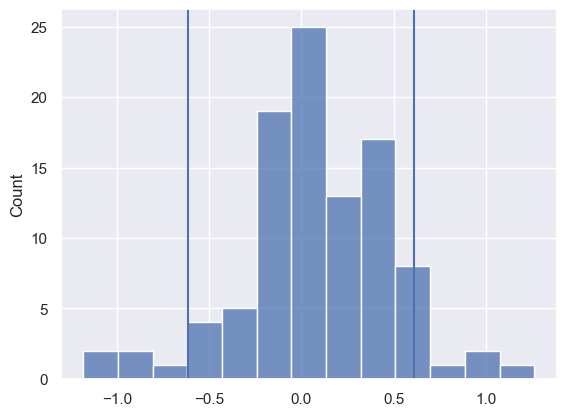

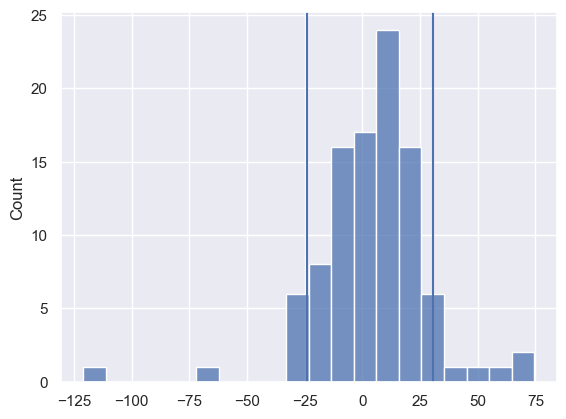

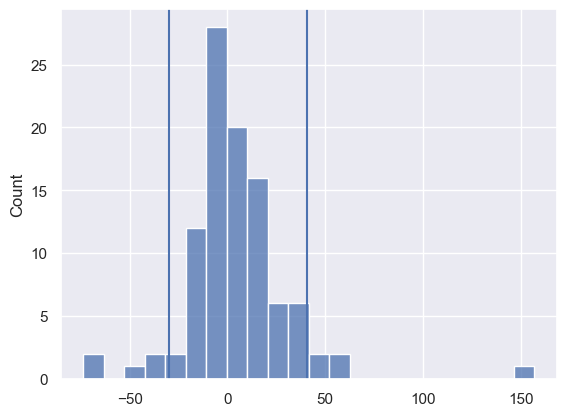

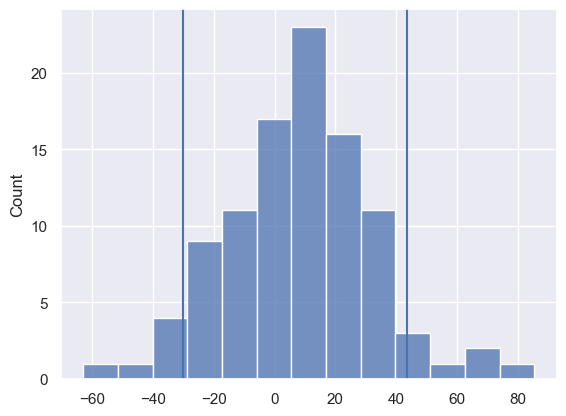

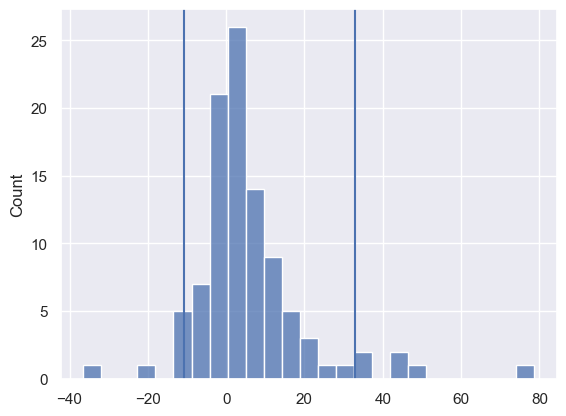

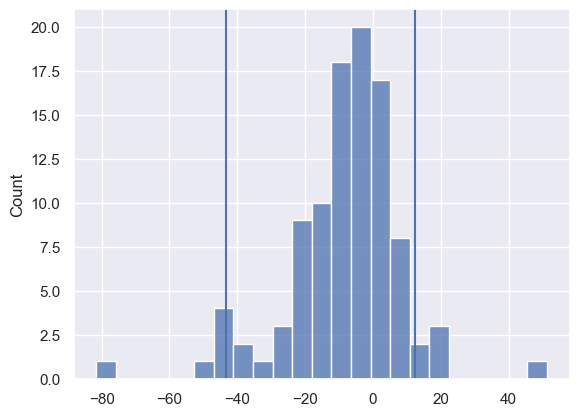

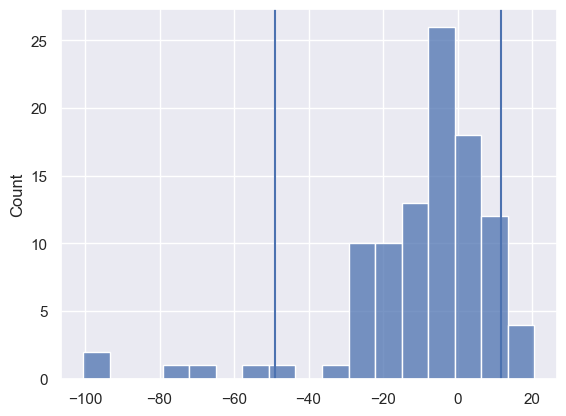

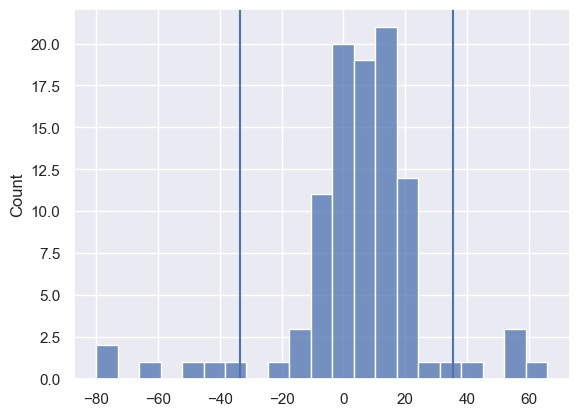

In [131]:
for i in range(8):
    coef = [f.coef_[i] for f in fitted_results]
    p1 = np.percentile(coef, 5)
    p2 = np.percentile(coef, 95)
    graph = sns.histplot(data=coef)
    graph.axvline(p1)
    graph.axvline(p2)
    plt.show()